## Analyzing NFL Supoerbowl Data
This project is about analyzing NFL Data which includes performance data, television viewership data and entertainment data relating to the NFL superbowl. It is a guided project I did for a short course on Dataquest. Data was sourced via wikipedia and scrapped by the instructor. In this project, I will answer a few questions based on the data such as:

1. What is the total combined points?
2. What are the superbowls with the higest and lowest scores?
3. Do blowouts result in loss of viewership?
4. How has viewership, ratings and tv adverts cost changed over time?
5. Which musician has most halftime show appearances and ,
6. Who performed most halftime songs?

So, let's proceed.

### Import relevant python Modules to be used for the analysis

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

## Read the data into the notebook

In [109]:
# Here, data is read into the notebook
tv_data = pd.read_csv('tv.csv')
super_bowls = pd.read_csv('super_bowls.csv')
halftime_musicians = pd.read_csv('halftime_musicians.csv')

# below code displays first 3 lines of each dataframe
display(tv_data.head(3))
display(super_bowls.head(3))
display(halftime_musicians.head(3))

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0


## Exploratory Data Analysis

In [110]:
# Check for missing data
display(tv_data.shape)
display(super_bowls.shape)
display(halftime_musicians.shape)

(53, 9)

(52, 18)

(134, 3)

In [111]:
# Check for missing data
display(tv_data.isna().values.any())
display(super_bowls.isna().values.any())
display(halftime_musicians.isna().values.any())

True

True

True

#### Word on Missing Data.

Above result shows we have some missing data. However, we cannot drop these data due to certain reasons.
From the shape of our data, we can see that the it is small, hence dropping columns will make us lose important data.
Hence, we will proceed with the analsysis and deal with missing data in other ways at appriopriate time.

In [112]:
# Check for duplicates
display(tv_data.duplicated().values.any())
display(super_bowls.duplicated().values.any())
display(halftime_musicians.duplicated().values.any())

False

False

False

# Data Analysis

### Question 1. What is the combinbed points distribution

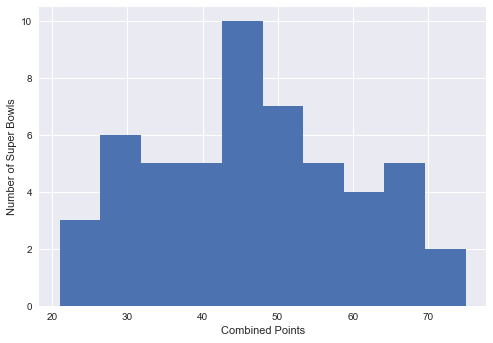

In [113]:
# Plot a histogram of combined points for each superbowl
plt.style.use('seaborn')
super_bowls['combined_pts'].hist()
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

### Question 2. What are the superbowls with the highest & lowest scores

In [114]:
# Let's also pinpoint the Super Bowls with the highest and lowest scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


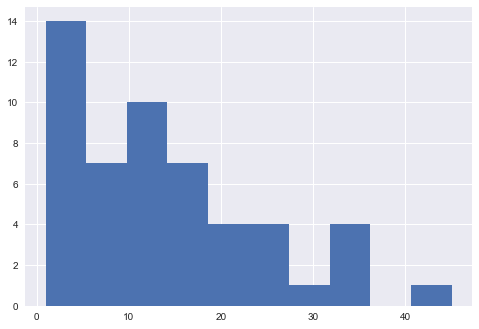

In [115]:
# points difference distribution
super_bowls['difference_pts'].hist()
plt.show()

### Question 3. Do blowouts result in loss of viewership?

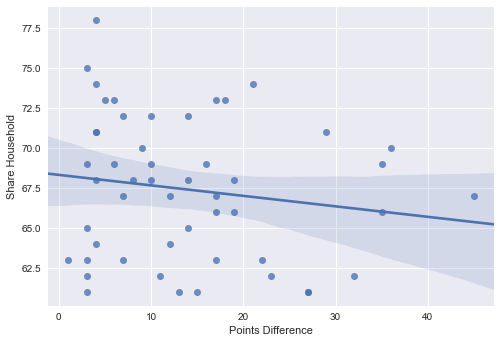

In [116]:
# Review of tv_data shows that superbowl 1 was split over 2 networks, so, it will be filtered out.

games_data = pd.merge(tv_data[tv_data['super_bowl'] > 1], super_bowls, on ='super_bowl')

fig , ax= plt.subplots()
sns.regplot(x='difference_pts', y='share_household', data=games_data)
ax.set_xlabel('Points Difference')
ax.set_ylabel('Share Household')
plt.show()

### Question 4. How has viewership, ratings and cost of adverts changed over time?

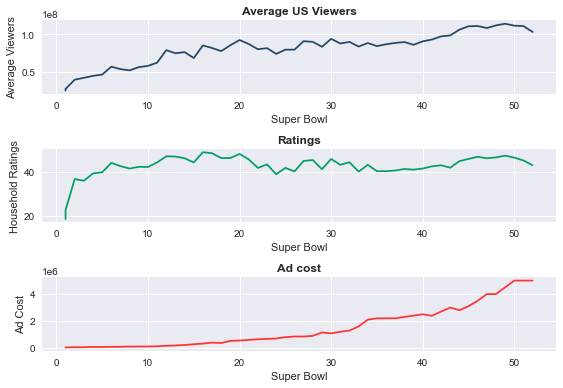

In [117]:
# viewership, ratings and adcost over time

plt.subplot(3, 1, 1)
plt.plot('super_bowl','avg_us_viewers', data = tv_data, color = '#244864')
plt.xlabel('Super Bowl')
plt.ylabel('Average Viewers')
plt.title('Average US Viewers', fontweight='bold')

plt.subplot(3, 1, 2)
plt.plot('super_bowl','rating_household', data = tv_data, color = '#019f66')
plt.xlabel('Super Bowl')
plt.ylabel('Household Ratings')
plt.title('Ratings', fontweight='bold')

plt.subplot(3, 1, 3)
plt.plot('super_bowl', 'ad_cost', data = tv_data, color = '#ff3333')
plt.xlabel('Super Bowl')
plt.ylabel('Ad Cost')
plt.title('Ad cost', fontweight='bold')

plt.tight_layout()
plt.show()


### Question 5. Which musician has most halftime show appearances

In [118]:
# Let's write the code to view the top 10
halftime_musicians.groupby('musician').count().sort_values(by='super_bowl', ascending=False).head(10)

,super_bowl,num_songs
musician,,
Grambling State University Tiger Marching Band,6,2
Up with People,4,0
Al Hirt,4,0
The Human Jukebox,3,0
Spirit of Troy,2,1
Florida A&M University Marching 100 Band,2,0
Gloria Estefan,2,2
University of Minnesota Marching Band,2,1
Bruno Mars,2,2


### Question 6. Who performed most half time songs?

From previous inspections, the num_songs column has a lot of missing values:

A lot of the marching bands don't have num_songs entries.
For non-marching bands, missing data starts occurring at Super Bowl XX.

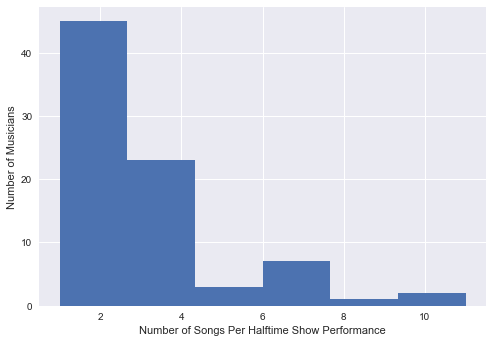

In [119]:
bands_sorted = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
bands_sorted = bands_sorted[~bands_sorted.musician.str.contains('Spirit')]

#Next, let's plot a histogram to visualize the data

most_songs = int(max(bands_sorted['num_songs'].values))
plt.hist(bands_sorted['num_songs'].dropna(), bins= 6)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

In [120]:
bands_sorted.sort_values('num_songs', ascending=False).head(10)

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


# Conclusion

## Using the data available, we have been able to answer some questions related to the NFL.

Let us recap the main points.

1. Blowouts does not result to loss of viewership.
2. There is direct correlation between viewership and cost of advertisement.
3. Justin Timberlake performed the most half-time songs.
